In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import librosa
import tensorflow
import keras
from pydub import AudioSegment
from keras import models,layers,utils
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
df=pd.read_csv('/content/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [ ]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,1.844345e+06,0.103612,0.002986,-3.659332e-04,0.012540,-0.000395,5.670073e-03,119.505363,-144.472987,3747.875414,99.554278,706.899539,-8.920291,468.286436,36.292447,220.447219,-1.144840,174.404462,14.633491,127.232071,-5.129038,116.367019,10.119172,88.198988,-6.994062,88.566933,7.729785,81.733490,-6.021069,75.551228,4.471693,68.670817,-4.795884,67.871712,1.781900,64.764096,-3.869308,62.873761,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,1.425085e+06,0.041821,0.003024,1.683946e-03,0.011653,0.001082,6.500325e-03,28.264176,100.229406,2770.558394,31.330873,439.120256,21.690676,287.143462,16.664665,116.236941,12.221340,100.767823,11.839591,68.475115,9.940460,58.400048,10.463270,41.048213,8.283921,39.494072,7.937309,36.733649,6.817013,38.135183,6.715787,32.625534,6.170181,33.154276,5.008385,34.450290,4.873599,33.904101,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,1.468612e+04,0.021697,0.000044,-2.606458e-02,0.000049,-0.007150,8.299008e-07,54.978391,-552.120056,174.571365,-1.461542,93.104752,-89.870193,35.467754,-18.727547,34.263149,-38.890347,29.912008,-28.415911,20.847921,-32.930431,29.027332,-24.915823,22.464230,-31.640574,25.825863,-12.050177,19.273201,-28.057501,21.402756,-15.796446,18.642517,-27.523129,17.293922,-12.594489,14.250607,-17.539125,9.769691,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,7.727312e+05,0.070244,0.001079,-1.041584e-04,0.004383,-0.000537,1.292592e-03,99.384014,-200.763893,1844.488129,76.779915,398.020767,-24.219811,270.466576,24.108212,129.397377,-9.979157,101.266209,5.098573,76.505194,-12.870810,73.546917,1.609181,57.349041,-13.246939,59.882313,1.620753,55.734016,-10.964135,51.242420,-0.547371,46.854038,-9.357906,46.294396,-1.639417,43.416593,-7.165884,42.236251,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,1.476115e+06,0.099503,0

In [ ]:
x=df.drop(['label', 'filename'],axis=1)
y=df['label']

In [ ]:
print(x.shape)
print(y.shape)

(1000, 59)
(1000,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 59)
(200, 59)
(800,)
(200,)


In [ ]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_model.score(x_train,y_train)

0.99875

In [ ]:
rf_model.score(x_test,y_test)

0.745

In [ ]:
y_pred=rf_model.predict(x_test)
print(y_pred)

['jazz' 'pop' 'pop' 'metal' 'hiphop' 'metal' 'metal' 'jazz' 'reggae'
 'classical' 'reggae' 'blues' 'metal' 'metal' 'pop' 'metal' 'rock'
 'reggae' 'pop' 'rock' 'pop' 'classical' 'disco' 'jazz' 'country'
 'country' 'classical' 'rock' 'hiphop' 'disco' 'disco' 'classical' 'metal'
 'hiphop' 'disco' 'classical' 'metal' 'jazz' 'rock' 'blues' 'disco' 'jazz'
 'disco' 'rock' 'rock' 'country' 'rock' 'metal' 'hiphop' 'reggae' 'jazz'
 'reggae' 'blues' 'country' 'blues' 'blues' 'metal' 'blues' 'country'
 'reggae' 'country' 'metal' 'jazz' 'rock' 'metal' 'metal' 'metal' 'reggae'
 'rock' 'jazz' 'classical' 'hiphop' 'jazz' 'pop' 'rock' 'country' 'metal'
 'blues' 'jazz' 'disco' 'metal' 'rock' 'blues' 'blues' 'hiphop' 'jazz'
 'country' 'reggae' 'pop' 'hiphop' 'hiphop' 'hiphop' 'jazz' 'country'
 'pop' 'hiphop' 'pop' 'blues' 'blues' 'reggae' 'pop' 'metal' 'rock'
 'country' 'metal' 'metal' 'jazz' 'jazz' 'classical' 'rock' 'jazz'
 'hiphop' 'rock' 'blues' 'blues' 'reggae' 'classical' 'rock' 'jazz'
 'country' '

In [ ]:
print(y_test)
print(y_pred)

521       jazz
737        pop
740        pop
660      metal
411     hiphop
        ...   
408     hiphop
332      disco
208    country
613      metal
78       blues
Name: label, Length: 200, dtype: object
['jazz' 'pop' 'pop' 'metal' 'hiphop' 'metal' 'metal' 'jazz' 'reggae'
 'classical' 'reggae' 'blues' 'metal' 'metal' 'pop' 'metal' 'rock'
 'reggae' 'pop' 'rock' 'pop' 'classical' 'disco' 'jazz' 'country'
 'country' 'classical' 'rock' 'hiphop' 'disco' 'disco' 'classical' 'metal'
 'hiphop' 'disco' 'classical' 'metal' 'jazz' 'rock' 'blues' 'disco' 'jazz'
 'disco' 'rock' 'rock' 'country' 'rock' 'metal' 'hiphop' 'reggae' 'jazz'
 'reggae' 'blues' 'country' 'blues' 'blues' 'metal' 'blues' 'country'
 'reggae' 'country' 'metal' 'jazz' 'rock' 'metal' 'metal' 'metal' 'reggae'
 'rock' 'jazz' 'classical' 'hiphop' 'jazz' 'pop' 'rock' 'country' 'metal'
 'blues' 'jazz' 'disco' 'metal' 'rock' 'blues' 'blues' 'hiphop' 'jazz'
 'country' 'reggae' 'pop' 'hiphop' 'hiphop' 'hiphop' 'jazz' 'country'
 'pop' 'hi

In [ ]:
print(accuracy_score(y_test,y_pred))

0.745


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       blues       0.65      0.75      0.70        20
   classical       0.93      1.00      0.96        13
     country       0.80      0.59      0.68        27
       disco       0.81      0.62      0.70        21
      hiphop       0.59      0.87      0.70        15
        jazz       0.90      0.86      0.88        22
       metal       0.83      0.96      0.89        25
         pop       0.73      0.85      0.79        13
      reggae       0.75      0.65      0.70        23
        rock       0.50      0.48      0.49        21

    accuracy                           0.74       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.75      0.74      0.74       200



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[15  0  0  0  0  1  1  0  0  3]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 6  0 16  0  0  0  0  0  0  5]
 [ 0  0  0 13  5  0  1  1  0  1]
 [ 0  0  0  0 13  0  0  0  2  0]
 [ 0  0  1  0  0 19  0  1  0  1]
 [ 0  0  0  1  0  0 24  0  0  0]
 [ 0  0  0  0  0  0  0 11  2  0]
 [ 2  0  1  0  3  0  1  1 15  0]
 [ 0  1  2  2  1  1  2  1  1 10]]


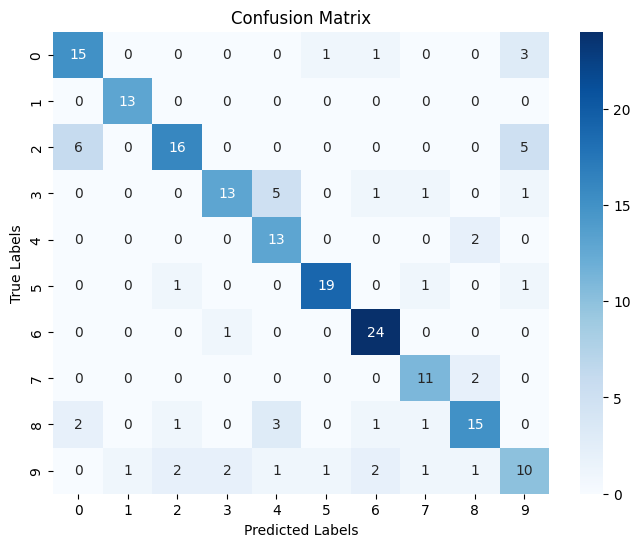

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(rf_model.feature_importances_)

[0.04552382 0.04340952 0.0300621  0.0278927  0.02581904 0.01782998
 0.0219369  0.0273259  0.01138986 0.02295049 0.02278595 0.01650804
 0.01390373 0.01299614 0.02052202 0.01760497 0.04758566 0.00846929
 0.02443008 0.01519536 0.01673493 0.01071017 0.01428287 0.01083745
 0.02723451 0.01700354 0.01249623 0.02563517 0.02193743 0.01610081
 0.01518861 0.0159915  0.01734314 0.01418242 0.02277799 0.01023461
 0.01110675 0.01590115 0.01767226 0.00944828 0.01545671 0.00969776
 0.01383086 0.00987879 0.01186629 0.00936118 0.01338639 0.0073981
 0.01180314 0.00795689 0.01647331 0.00830796 0.00873466 0.01074625
 0.01043023 0.01242843 0.01010976 0.01517192]


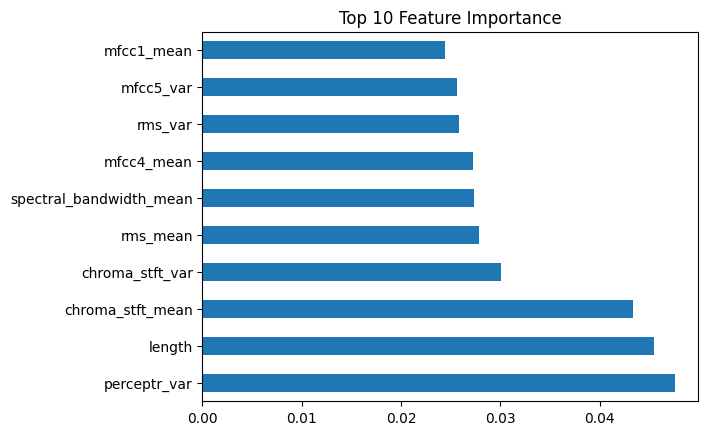

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_,index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importance")
plt.show()

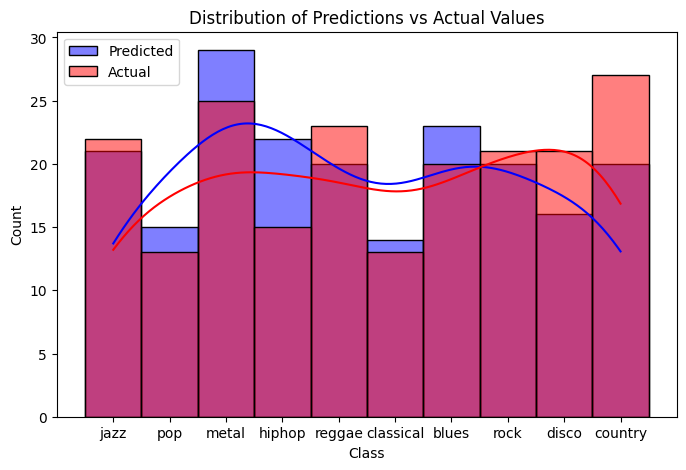

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/archive (1).zip"

In [17]:
import os

print(os.listdir("/content/drive/MyDrive/GTZAN_extracted"))
print(os.listdir("/content/drive/MyDrive/GTZAN_extracted/Data"))
print(os.listdir("/content/drive/MyDrive/GTZAN_extracted/Data/genres_original"))

['Data']
['images_original', 'features_3_sec.csv', 'genres_original', 'features_30_sec.csv']
['country', 'pop', 'reggae', 'disco', 'rock', 'jazz', 'metal', 'blues', 'hiphop', 'classical', 'Data']


In [5]:
DATASET_PATH = "/content/drive/MyDrive/GTZAN_extracted/Data/genres_original"


In [19]:
print(os.listdir(DATASET_PATH))

['country', 'pop', 'reggae', 'disco', 'rock', 'jazz', 'metal', 'blues', 'hiphop', 'classical', 'Data']


In [6]:
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            try:
                audio = AudioSegment.from_file(file_path)
                audio = audio.set_channels(1).set_frame_rate(22050)
                audio.export(file_path, format="wav")
            except:
                print(f"unvalid file {file_path}")

unvalid file /content/drive/MyDrive/GTZAN_extracted/Data/genres_original/jazz/jazz.00054.wav
unvalid file /content/drive/MyDrive/GTZAN_extracted/Data/genres_original/Data/genres_original/jazz/jazz.00054.wav


In [7]:
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, duration=30)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        return np.mean(mfcc.T, axis=0)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None


X, y = [], []
genres = os.listdir(DATASET_PATH)
for genre in genres:
    genre_path = os.path.join(DATASET_PATH, genre)
    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            features = extract_features(file_path)
            if features is not None:
                X.append(features)
                y.append(genre)



/tmp/ipython-input-3292891292.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing file /content/drive/MyDrive/GTZAN_extracted/Data/genres_original/jazz/jazz.00054.wav: 


In [40]:
X = np.array(X)
y = np.array(y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [42]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
model.score(X_train,y_train)

0.9987484355444305

In [44]:
model.score(X_test,y_test)

0.535

In [45]:
y_pred = model.predict(X_test)
print(y_pred)

['disco' 'blues' 'disco' 'reggae' 'blues' 'blues' 'hiphop' 'country'
 'reggae' 'metal' 'classical' 'metal' 'pop' 'metal' 'blues' 'reggae'
 'metal' 'blues' 'disco' 'hiphop' 'jazz' 'classical' 'pop' 'hiphop'
 'classical' 'blues' 'reggae' 'reggae' 'rock' 'rock' 'jazz' 'pop' 'metal'
 'pop' 'metal' 'metal' 'pop' 'reggae' 'metal' 'jazz' 'blues' 'country'
 'classical' 'jazz' 'pop' 'jazz' 'reggae' 'blues' 'jazz' 'reggae' 'metal'
 'jazz' 'classical' 'country' 'country' 'rock' 'jazz' 'blues' 'jazz'
 'blues' 'country' 'metal' 'disco' 'pop' 'blues' 'pop' 'jazz' 'blues'
 'reggae' 'hiphop' 'country' 'pop' 'disco' 'hiphop' 'jazz' 'classical'
 'pop' 'jazz' 'jazz' 'classical' 'country' 'jazz' 'jazz' 'hiphop' 'disco'
 'rock' 'metal' 'jazz' 'pop' 'jazz' 'disco' 'hiphop' 'disco' 'classical'
 'jazz' 'disco' 'disco' 'reggae' 'rock' 'jazz' 'metal' 'reggae' 'reggae'
 'classical' 'jazz' 'classical' 'blues' 'jazz' 'classical' 'metal'
 'classical' 'classical' 'rock' 'reggae' 'hiphop' 'reggae' 'classical'
 'rock'

In [46]:
print(y_test)
print(y_pred)

['rock' 'blues' 'reggae' 'disco' 'blues' 'jazz' 'hiphop' 'jazz' 'rock'
 'metal' 'classical' 'metal' 'hiphop' 'metal' 'blues' 'country' 'hiphop'
 'rock' 'disco' 'reggae' 'jazz' 'disco' 'hiphop' 'hiphop' 'classical'
 'country' 'pop' 'reggae' 'hiphop' 'disco' 'jazz' 'disco' 'metal' 'jazz'
 'metal' 'metal' 'pop' 'pop' 'metal' 'jazz' 'blues' 'disco' 'classical'
 'rock' 'pop' 'jazz' 'reggae' 'blues' 'country' 'hiphop' 'metal' 'jazz'
 'classical' 'country' 'country' 'disco' 'country' 'jazz' 'jazz' 'blues'
 'country' 'metal' 'hiphop' 'jazz' 'blues' 'disco' 'jazz' 'blues' 'reggae'
 'hiphop' 'country' 'pop' 'metal' 'pop' 'jazz' 'classical' 'country'
 'blues' 'jazz' 'classical' 'country' 'jazz' 'country' 'hiphop' 'disco'
 'rock' 'metal' 'jazz' 'rock' 'rock' 'disco' 'rock' 'hiphop' 'jazz'
 'blues' 'country' 'country' 'hiphop' 'metal' 'hiphop' 'metal' 'rock'
 'reggae' 'classical' 'jazz' 'classical' 'blues' 'jazz' 'classical'
 'metal' 'classical' 'pop' 'country' 'reggae' 'disco' 'disco' 'jazz'
 'dis

In [47]:
print(accuracy_score(y_test, y_pred))

0.535


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.76      0.84      0.80        19
   classical       0.70      0.80      0.74        20
     country       0.50      0.38      0.43        21
       disco       0.35      0.32      0.33        22
      hiphop       0.58      0.32      0.41        22
        jazz       0.56      0.56      0.56        27
       metal       0.84      0.89      0.86        18
         pop       0.32      0.50      0.39        12
      reggae       0.52      0.58      0.55        24
        rock       0.12      0.13      0.13        15

    accuracy                           0.54       200
   macro avg       0.52      0.53      0.52       200
weighted avg       0.54      0.54      0.53       200



In [49]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0  0  0  3  0  0  0  0]
 [ 0 16  2  1  0  0  0  0  1  0]
 [ 1  0  8  2  0  5  0  2  1  2]
 [ 0  1  2  7  1  0  0  2  3  6]
 [ 1  0  0  3  7  1  2  4  2  2]
 [ 2  3  2  0  1 15  0  2  0  2]
 [ 0  0  0  1  0  0 16  0  0  1]
 [ 0  1  0  1  1  0  0  6  3  0]
 [ 0  1  1  3  1  1  0  2 14  1]
 [ 1  1  1  2  1  2  1  1  3  2]]


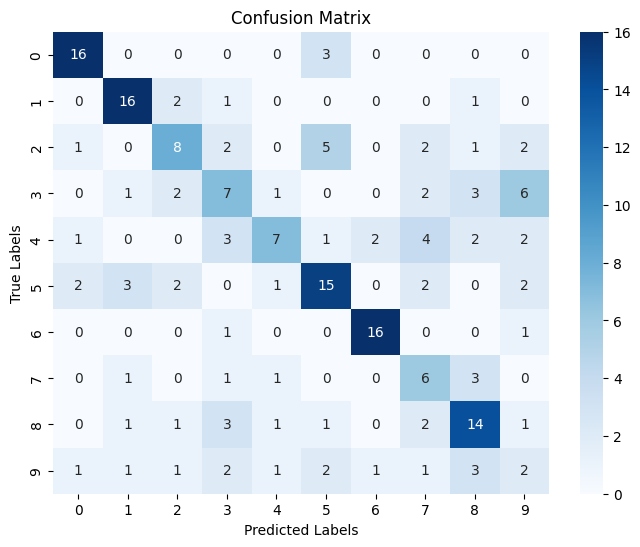

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(model.feature_importances_)

[0.12336781 0.08842222 0.07296535 0.09724498 0.0646898  0.07518288
 0.06830171 0.06866996 0.0826349  0.05397934 0.06338495 0.07371137
 0.06744474]


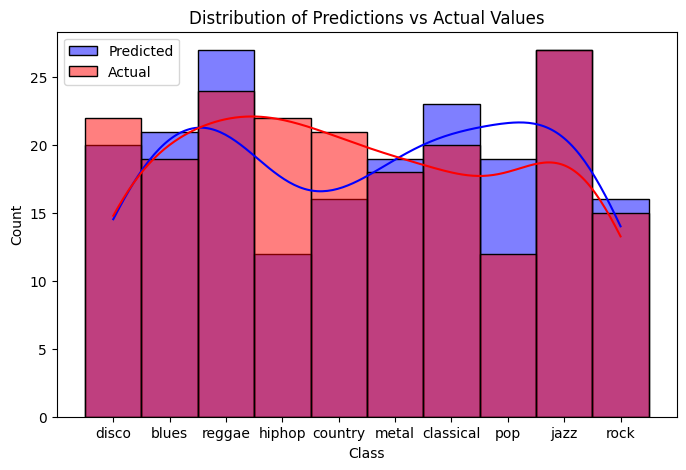

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


#Bonus

# Image-Based Approach

In [66]:
IMG_SIZE = (128, 128)
os.makedirs("spectrograms", exist_ok=True)

def audio_to_spectrogram(file_path, save_path):
    try:
        y, sr = librosa.load(file_path, duration=30)
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_DB = librosa.power_to_db(S, ref=np.max)
        plt.figure(figsize=(2, 2))
        librosa.display.specshow(S_DB, sr=sr)
        plt.axis('off')
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None


for genre in genres:
    save_dir = os.path.join("spectrograms", genre)
    os.makedirs(save_dir, exist_ok=True)
    genre_path = os.path.join(DATASET_PATH, genre)
    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            save_path = os.path.join(save_dir, file.replace(".wav", ".png"))
            if not os.path.exists(save_path):
                audio_to_spectrogram(file_path, save_path)


from PIL import Image
X_img, y_img = [], []
for i, genre in enumerate(genres):
    genre_path = os.path.join("spectrograms", genre)
    for file in os.listdir(genre_path):
        img_path = os.path.join(genre_path, file)
        try:
            img = Image.open(img_path).convert('RGB').resize(IMG_SIZE) # Convert to RGB
            X_img.append(np.array(img))
            y_img.append(i)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


X_img = np.array(X_img) / 255.0
y_img = to_categorical(y_img, num_classes=len(genres))

/tmp/ipython-input-2526585609.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing file /content/drive/MyDrive/GTZAN_extracted/Data/genres_original/jazz/jazz.00054.wav: 


In [67]:
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(X_img, y_img, test_size=0.2, random_state=42)

In [68]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(genres), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_img, y_train_img, epochs=5, validation_data=(X_test_img, y_test_img))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 821ms/step - accuracy: 0.0920 - loss: 2.5915 - val_accuracy: 0.2250 - val_loss: 2.1924
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 760ms/step - accuracy: 0.3023 - loss: 2.0350 - val_accuracy: 0.3650 - val_loss: 1.8718
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 832ms/step - accuracy: 0.3636 - loss: 1.7785 - val_accuracy: 0.3150 - val_loss: 1.9705
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 794ms/step - accuracy: 0.4599 - loss: 1.6073 - val_accuracy: 0.3350 - val_loss: 1.7552
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 846ms/step - accuracy: 0.4943 - loss: 1.4016 - val_accuracy: 0.4550 - val_loss: 1.5233


In [69]:
print(cnn_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,119,715 (42.42 MB)

 Trainable params: 3,706,571 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,413,144 (28.28 MB)

None


In [70]:
print(classification_report(np.argmax(y_test_img, axis=1), np.argmax(cnn_model.predict(X_test_img), axis=1)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
              precision    recall  f1-score   support

           0       0.30      0.43      0.35        21
           1       0.39      0.75      0.51        12
           2       0.33      0.08      0.13        24
           3       0.00      0.00      0.00        22
           4       0.46      0.40      0.43        15
           5       0.73      0.30      0.42        27
           6       0.84      0.89      0.86        18
           7       0.28      0.42      0.33        19
           8       0.35      0.77      0.49        22
           9       0.76      0.80      0.78        20

    accuracy                           0.46       200
   macro avg       0.44      0.48      0.43       200
weighted avg       0.44      0.46      0.41       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
print(accuracy_score(np.argmax(y_test_img, axis=1), np.argmax(cnn_model.predict(X_test_img), axis=1)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
0.455


In [72]:
cm=confusion_matrix(np.argmax(y_test_img, axis=1), np.argmax(cnn_model.predict(X_test_img), axis=1))
print(cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
[[ 9  0  0  0  1  0  0  4  4  3]
 [ 2  9  0  0  0  1  0  0  0  0]
 [ 5  2  2  0  0  0  0  9  6  0]
 [ 4  6  0  0  4  0  0  0  8  0]
 [ 1  1  1  0  6  1  2  1  2  0]
 [ 5  4  0  0  0  8  0  6  3  1]
 [ 0  0  0  0  0  0 16  0  2  0]
 [ 0  0  0  0  2  1  1  8  6  1]
 [ 0  1  3  0  0  0  0  1 17  0]
 [ 4  0  0  0  0  0  0  0  0 16]]


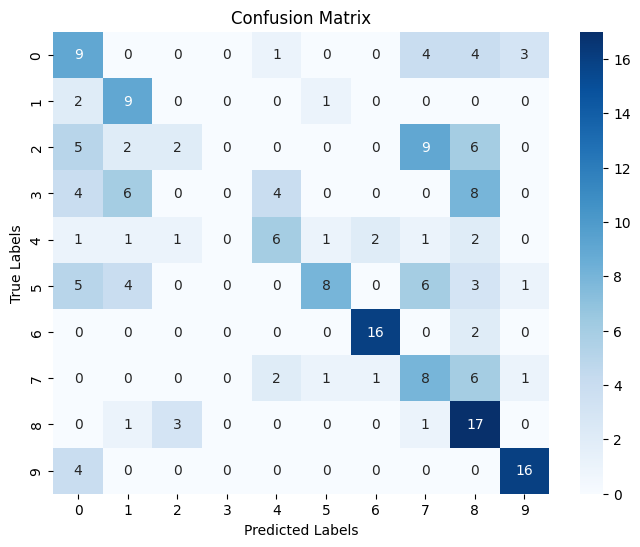

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

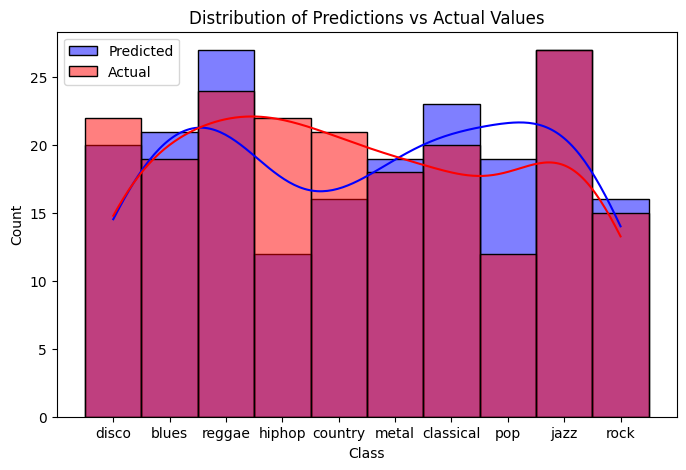

In [74]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Transfer Learning

In [8]:
IMG_SIZE_VGG = (224, 224)
X_vgg, y_vgg = [], []
for i, genre in enumerate(genres):
    genre_path = os.path.join("spectrograms", genre)
    for file in os.listdir(genre_path):
        img_path = os.path.join(genre_path, file)
        try:
            img = Image.open(img_path).convert('RGB').resize(IMG_SIZE_VGG) # Convert to RGB
            X_vgg.append(np.array(img))
            y_vgg.append(i)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


X_vgg = np.array(X_vgg) / 255.0
y_vgg = to_categorical(y_vgg, num_classes=len(genres))

X_train_vgg, X_test_vgg, y_train_vgg, y_test_vgg = train_test_split(X_vgg, y_vgg, test_size=0.2, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE_VGG[0], IMG_SIZE_VGG[1], 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(genres), activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=output)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.fit(X_train_vgg, y_train_vgg, epochs=1, validation_data=(X_test_vgg, y_test_vgg))

25/25 ━━━━━━━━━━━━━━━━━━━━ 567s 23s/step - accuracy: 0.1836 - loss: 2.6328 - val_accuracy: 0.3850 - val_loss: 1.8690


In [9]:
print(classification_report(np.argmax(y_test_vgg, axis=1), np.argmax(vgg_model.predict(X_test_vgg), axis=1)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 117s 17s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.17      0.67      0.27        12
           2       0.82      0.38      0.51        24
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        15
           5       0.44      0.67      0.53        27
           6       0.88      0.83      0.86        18
           7       0.18      0.47      0.26        19
           8       0.00      0.00      0.00        22
           9       0.55      0.90      0.68        20

    accuracy                           0.39       200
   macro avg       0.30      0.39      0.31       200
weighted avg       0.32      0.39      0.32       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
print(accuracy_score(np.argmax(y_test_vgg, axis=1), np.argmax(vgg_model.predict(X_test_vgg), axis=1)))

7/7 ━━━━━━━━━━━━━━━━━━━━ 108s 15s/step
0.385


In [11]:
print(vgg_model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,353,123 (92.90 MB)

 Trainable params: 3,212,811 (12.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 6,425,624 (24.51 MB)

None


In [22]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
